<a href="https://colab.research.google.com/github/stevenchristm/AOL_SC/blob/main/aolsc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# DATA
x_months = np.arange(1, 145)
y_production = np.array([
    1863,1614,2570,1685,2101,1811,2457,2171,2134,2502,2358,2399,
    2048,2523,2086,2391,2150,2340,3129,2277,2964,2997,2747,2862,
    3405,2677,2749,2755,2963,3161,3623,2768,3141,3439,3601,3531,
    3477,3376,4027,3175,3274,3334,3964,3649,3502,3688,3657,4422,
    4197,4441,4736,4521,4485,4644,5036,4876,4789,4544,4975,5211,
    4880,4933,5079,5339,5232,5520,5714,5260,6110,5334,5988,6235,
    6365,6266,6345,6118,6497,6278,6638,6590,6271,7246,6584,6594,
    7092,7326,7409,7976,7959,8012,8195,8008,8313,7791,8368,8933,
    8756,8613,8705,9098,8769,9544,9050,9186,10012,9685,9966,10048,
    10244,10740,10318,10393,10986,10635,10731,11749,11849,12123,
    12274,11666,11960,12629,12915,13051,13387,13309,13732,13162,
    13644,13808,14101,13992,15191,15018,14917,15046,15556,15893,
    16388,16782,16716,17033,16896,17689
])

In [39]:
# FIT POLYNOMIAL DEGREE 4 (to slightly differ from degree 3 and avoid overfitting)
deg = 4
poly_coef = np.polyfit(x_months, y_production, deg)
poly_func = np.poly1d(poly_coef)
y_poly_fit = poly_func(x_months)
r2_poly = r2_score(y_production, y_poly_fit)

# FIT EXPONENTIAL CURVE
def exponential_form(x, a, b):
    return a * np.exp(b * x)

params_exp, _ = curve_fit(exponential_form, x_months, y_production, maxfev=10000)
y_exp_fit = exponential_form(x_months, *params_exp)
r2_exp = r2_score(y_production, y_exp_fit)

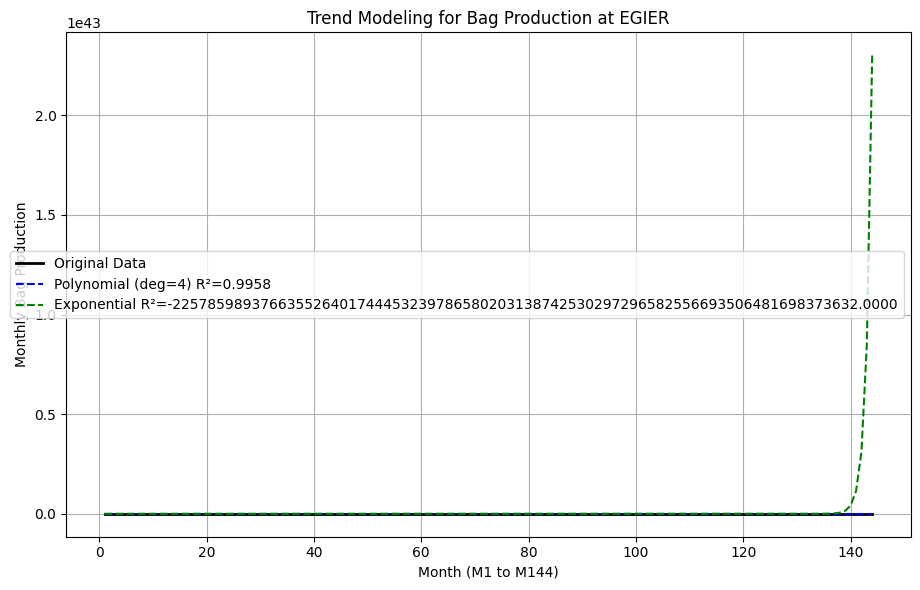

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x_months, y_production, 'k-', label='Original Data', linewidth=2)
plt.plot(x_months, y_poly_fit, 'b--', label=f'Polynomial (deg={deg}) R²={r2_poly:.4f}')
plt.plot(x_months, y_exp_fit, 'g--', label=f'Exponential R²={r2_exp:.4f}')
plt.xlabel('Month (M1 to M144)')
plt.ylabel('Monthly Bag Production')
plt.title('Trend Modeling for Bag Production at EGIER')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# MODEL SELECTION
if r2_poly > r2_exp:
    print("Selected Model: Polynomial")
    print("Equation: ", poly_model)
else:
    print("Selected Model: Exponential")
    print(f"Equation: y = {popt_exp[0]:.3f} * exp({popt_exp[1]:.6f} * x)")

Selected Model: Polynomial
Equation:         3         2
0.004 x - 0.134 x + 47.22 x + 1749


2

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Data asli produksi tas (bulan ke-1 sampai ke-144)
produksi_bulanan = np.array([
    1863,1614,2570,1685,2101,1811,2457,2171,2134,2502,2358,2399,2048,2523,2086,2391,2150,2340,
    3129,2277,2964,2997,2747,2862,3405,2677,2749,2755,2963,3161,3623,2768,3141,3439,3601,3531,
    3477,3376,4027,3175,3274,3334,3964,3649,3502,3688,3657,4422,4197,4441,4736,4521,4485,4644,
    5036,4876,4789,4544,4975,5211,4880,4933,5079,5339,5232,5520,5714,5260,6110,5334,5988,6235,
    6365,6266,6345,6118,6497,6278,6638,6590,6271,7246,6584,6594,7092,7326,7409,7976,7959,8012,
    8195,8008,8313,7791,8368,8933,8756,8613,8705,9098,8769,9544,9050,9186,10012,9685,9966,10048,
    10244,10740,10318,10393,10986,10635,10731,11749,11849,12123,12274,11666,11960,12629,12915,
    13051,13387,13309,13732,13162,13644,13808,14101,13992,15191,15018,14917,15046,15556,15893,
    16388,16782,16716,17033,16896,17689
])

bulan = np.arange(1, len(produksi_bulanan) + 1)

# Buat model polinomial tingkat 3
koef = np.polyfit(bulan, produksi_bulanan, 3)
model_polinom = np.poly1d(koef)

# Hitung prediksi dan nilai R-squared (akurasi model)
prediksi = model_polinom(bulan)
akurasi_r2 = r2_score(produksi_bulanan, prediksi)

# Fungsi bantu pembulatan ke 3 digit signifikan
def pembulatan_tiga(value):
    return float(f"{value:.3f}")

koef_pembulatan = list(map(pembulatan_tiga, koef))
r2_pembulatan = pembulatan_tiga(akurasi_r2)

# Tampilkan hasil model numerik
print("Persamaan Model Numerik (Polinomial Orde 3):")
print(f"y(x) = {koef_pembulatan[0]}*x^3 + ({koef_pembulatan[1]})*x^2 + ({koef_pembulatan[2]})*x + {koef_pembulatan[3]}")
print(f"R² (Koefisien Determinasi): {r2_pembulatan}")

# Prediksi ke depan (bulan ke-145, 150, 160)
bulan_prediksi = [145, 150, 160]
for b in bulan_prediksi:
    hasil = model_polinom(b)
    print(f"Prediksi produksi bulan ke-{b}: {pembulatan_tiga(hasil)} tas")

Persamaan Model Numerik (Polinomial Orde 3):
y(x) = 0.004*x^3 + (-0.134)*x^2 + (47.224)*x + 1748.507
R² (Koefisien Determinasi): 0.996
Prediksi produksi bulan ke-145: 17548.727 tas
Prediksi produksi bulan ke-150: 18847.542 tas
Prediksi produksi bulan ke-160: 21688.689 tas


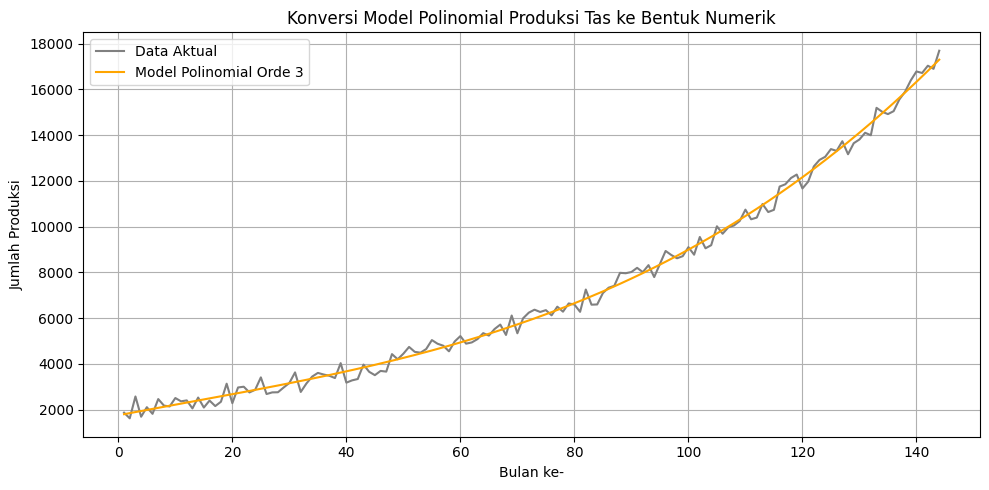

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(bulan, produksi_bulanan, color='gray', label='Data Aktual')
plt.plot(bulan, prediksi, color='orange', linestyle='-', label='Model Polinomial Orde 3')
plt.title('Konversi Model Polinomial Produksi Tas ke Bentuk Numerik')
plt.xlabel('Bulan ke-')
plt.ylabel('Jumlah Produksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3

In [44]:
import numpy as np
from scipy.optimize import brentq

# Koefisien model polinomial yang diperoleh dari soal #2 (sesuaikan jika kamu pakai model lain)
# Format: [a, b, c, d] untuk ax^3 + bx^2 + cx + d
koef_polinomial = [0.004, -0.134, 47.224, 1748.507]
fungsi_model = np.poly1d(koef_polinomial)

# Target kapasitas maksimum gudang per bulan
kapasitas_maks = 25000

# Fungsi selisih antara model produksi dan batas kapasitas gudang
def selisih_produksi(bulan):
    return fungsi_model(bulan) - kapasitas_maks

# Cari bulan saat produksi pertama kali melebihi kapasitas (antara bulan 150 dan 300)
bulan_kritis = brentq(selisih_produksi, 150, 300)

# Karena pembangunan butuh 13 bulan, kita kurangkan dari waktu kritis
bulan_mulai_pembangunan = bulan_kritis - 13

# Tampilkan hasil
print(f"Prediksi produksi mencapai 25.000 tas/bulan pada bulan ke-{bulan_kritis:.2f}")
print(f"EIGER disarankan mulai membangun gudang baru pada bulan ke-{bulan_mulai_pembangunan:.2f}")

Prediksi produksi mencapai 25.000 tas/bulan pada bulan ke-168.39
EIGER disarankan mulai membangun gudang baru pada bulan ke-155.39
